<a href="https://colab.research.google.com/github/yrc00/DACON/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4/%EB%94%B0%EB%A6%89%EC%9D%B4_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DACON/따릉이/data

/content/drive/MyDrive/DACON/따릉이/data


In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

# 모델 선택

In [ ]:
# 모델의 성능을 비교하기 위해 우선 결측치를 0으로 채운다.
train_fill = train.fillna(0)
test_fill = test.fillna(0)
print(train_fill.isna().sum())
print(test_fill.isna().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64
id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64


- count의 값은 시간에 따른 따릉이 대여 수로 회귀 모델을 사용해야 한다.
- 전처리 진행 전 base model로 어떤 모델을 사용할지 선택

## 모델링에 사용한 함수들

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_regr(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('RMSE: {}'.format(rmse))
  print('MAE : {}'.format(mae))
  print('r2  : {}'.format(r2))

- 모델의 성능지표를 확인하기 위한 함수 evaluate_regr
- 회귀 모델 성능 측정에는 mse, mae, r2 score 등의 지표들이 사용된다.
- 해당 따릉이 대여량 예측 경진대회의 경우 rmse를 사용하므로, mae, r2는 참고용으로 사용

In [ ]:
def get_model_predict(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(model.__class__.__name__)
  evaluate_regr(y_test, y_pred)
  print('\n')

- 모델의 성능지표를 확인하기 위한 함수 evaluate_regr
- 회귀 모델 성능 측정에는 mse, mae, r2 score 등의 지표들이 사용된다.
- 해당 따릉이 대여량 예측 경진대회의 경우 rmse를 사용하므로, mae, r2는 참고용으로 사용

## Regression model

- 선형 회귀 모델들: LinearRegression, Ridge, Lasso
- ensemble: RandomForestRegressor, GradientBoostingRegressor
- XGBRegressor, LGBMRegressor

In [ ]:
from sklearn.model_selection import train_test_split

X = train_fill.drop(columns='count')
y = train_fill['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=123)

### lr, ridge, lasso

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

for model in [lr, ridge, lasso]:
  get_model_predict(model, X_train, X_test, y_train, y_test)

LinearRegression
RMSE: 48.61797866710543
MAE : 37.598815660870194
r2  : 0.603784402108289


Ridge
RMSE: 48.665868242440425
MAE : 37.512988664518296
r2  : 0.6030034588275299


Lasso
RMSE: 48.70075767143529
MAE : 37.49923009070359
r2  : 0.6024340269795796




### rf, gb, xgb, lgbm

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()

for model in [rf, gb, xgb, lgbm]:
  get_model_predict(model, X_train, X_test, y_train, y_test)

RandomForestRegressor
RMSE: 35.610866299911
MAE : 24.227260273972604
r2  : 0.7874295711714177


GradientBoostingRegressor
RMSE: 38.999220522886695
MAE : 26.496119405350516
r2  : 0.7450531650433888


XGBRegressor
RMSE: 37.49436598970792
MAE : 25.000447841539774
r2  : 0.7643487218685883


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 10
[LightGBM] [Info] Start training from score 110.227935
LGBMRegressor
RMSE: 37.379165463746766
MAE : 25.33110113182993
r2  : 0.7657945629163504




- RMSE는 값이 작을 수록 좋다.
- RMSE 값이 가장 작은 것은 RandomForest

## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = train_fill.drop(columns='count')
y_train = train_fill['count']
X_test = test_fill.copy()

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.head()

,id,count
0,0,93.03
1,1,233.41
2,2,91.26
3,4,29.12
4,5,69.91


In [ ]:
submission.to_csv('rf_base.csv', index=False)

- 45.85175869

# 결측치 처리

## hour에 따른 평균값으로 대체

- 데이터들이 시간에 따른 경향성을 보인다.
- 시각이 같은 데이터들의 평균 값으로 대체한다.
- 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'는 'count'와 큰 상관관계가 없고 hour이 1일 때의 데이터가 없으므로 모델링 학습에 포함하지 않는다.

### train

In [ ]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [ ]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility']

train_mean = train[features].copy()
train_mean.isnull().sum()

hour                      0
hour_bef_temperature      2
hour_bef_precipitation    2
hour_bef_windspeed        9
hour_bef_humidity         2
hour_bef_visibility       2
dtype: int64

In [ ]:
hourly_mean = train_mean.groupby('hour').mean()

In [ ]:
def fill_na_hourly(df, columns, hourly_mean):
  for col in columns:
    nan_rows = train_mean[train_mean[col].isnull()]
    for idx, row in nan_rows.iterrows():
      hour = row['hour']
      mean_value = hourly_mean.loc[hour, col]
      train_mean.at[idx, col] = mean_value

In [ ]:
target_columns = ['hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility']
fill_na_hourly(train_mean, target_columns, hourly_mean)

In [ ]:
train_mean.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
dtype: int64

### test

In [ ]:
def fill_na_hourly(df, columns, hourly_mean):
  for col in columns:
    nan_rows = test_mean[test_mean[col].isnull()]
    for idx, row in nan_rows.iterrows():
      hour = row['hour']
      mean_value = hourly_mean.loc[hour, col]
      test_mean.at[idx, col] = mean_value

In [ ]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility']

test_mean = test[features].copy()

In [ ]:
target_columns = ['hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility']
fill_na_hourly(test_mean, target_columns, hourly_mean)

### model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = train_mean.copy()
y_train = train['count']
X_test = test_mean.copy()

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.head()

,id,count
0,0,83.07
1,1,245.82
2,2,74.56
3,4,30.27
4,5,60.14


In [ ]:
submission.to_csv('rf_mean.csv', index=False)

- 44.4333755126

## hour에 따른 평균값으로 대체 (dtype 변경)

### train

In [ ]:
train_mean_int = train_mean.copy()
train_mean_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1459 non-null   float64
 2   hour_bef_precipitation  1459 non-null   float64
 3   hour_bef_windspeed      1459 non-null   float64
 4   hour_bef_humidity       1459 non-null   float64
 5   hour_bef_visibility     1459 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.5 KB


In [ ]:
train_mean_int['hour_bef_precipitation'] = train_mean_int['hour_bef_precipitation'].astype(int)
train_count = train['count'].astype(int)
train_mean_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1459 non-null   float64
 2   hour_bef_precipitation  1459 non-null   int64  
 3   hour_bef_windspeed      1459 non-null   float64
 4   hour_bef_humidity       1459 non-null   float64
 5   hour_bef_visibility     1459 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 68.5 KB


### test

In [ ]:
test_mean_int = test_mean.copy()
test_mean_int['hour_bef_precipitation'] = test_mean_int['hour_bef_precipitation'].astype(int)

### model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = train_mean_int.copy()
y_train = train['count']
X_test = test_mean_int.copy()

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.head()

,id,count
0,0,83.53
1,1,246.87
2,2,74.72
3,4,30.27
4,5,59.76


In [ ]:
submission.to_csv('rf_mean_int.csv', index=False)

- 44.6915261676

## 보간법

[**pd.interpolate**](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fpandas.pydata.org%2Fdocs%2Freference%2Fapi%2Fpandas.DataFrame.interpolate.html)

> df.interpolate(method='linear', , axis=0, limit=None, inplace=False, limit_direction=None, limit_area=None, downcast=_NoDefault.no_default, *kwargs)
>
- method: str, default 'linear'
    - 'linear': 인덱스를 무시하고 값을 동일한 간격으로 처리
    - 'time': 일별 및 고해상도 데이터에서 작동하여 주어진 간격 길이를 보간
    - 'index', ‘values’: 인덱스의 실제 숫자 값을 사용
    - 'pad': 기존 값을 사용하여 NaN 채움
    - 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'polynomial': 인덱스의 숫자 값을 사용
    - ‘polynomial’, ‘spline’: 인덱스의 숫자 값을 사용, 순서(int)도 지정
    - 'krogh', ‘piecewise_polynomial’, ‘spline’, ‘pchip’, ‘akima’, ‘cubicspline’: SciPy 보간 메서드
    - 'from_derivatives': *scipy.interpolate.BPoly.from_derivatives*
- axis: {{0 or ‘index’, 1 or ‘columns’, None}}, default None
- limit: int, optional
- inplace; bool, default False
- limit_direction: {{'forward', 'backward', 'both'}}, Optional
    - default값은 forward
    - method가 pad, fill: limit_direction은 foward여야 한다.
    - method가 backfill, bfill: limit_direction은 backward여야 한다. (이 경우 default는 backward)
- limit_area: {{None, ‘inside’, ‘outside’}}, default None
- downcast: optional, ‘infer’ or None, defaults to None

### train

In [ ]:
train_interpolate = train.drop(columns='id')
train_interpolate.isnull().sum()

hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

<Axes: >

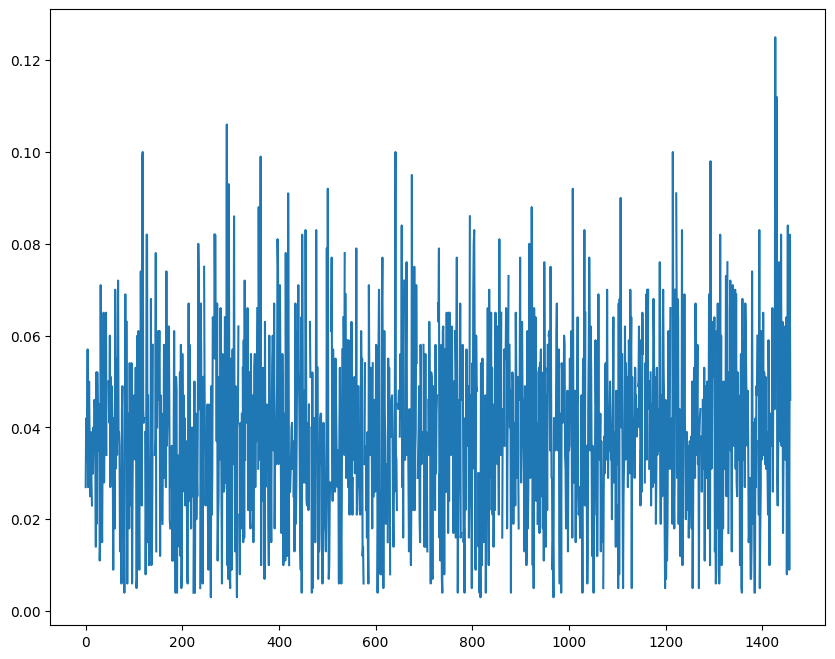

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
train_interpolate['hour_bef_ozone'].plot()

In [ ]:
train_interpolate[train_interpolate['hour_bef_ozone'].isnull()].index

Int64Index([  14,   44,   46,   84,  122,  140,  142,  147,  158,  176,  222,
             236,  244,  265,  289,  317,  324,  331,  356,  422,  429,  451,
             463,  466,  472,  479,  507,  532,  537,  554,  576,  579,  589,
             595,  623,  624,  631,  645,  649,  660,  686,  698,  708,  728,
             745,  763,  778,  796,  811,  861,  868,  876,  897,  934,  957,
             970, 1024, 1035, 1070, 1100, 1120, 1142, 1154, 1156, 1165, 1168,
            1186, 1211, 1221, 1273, 1278, 1283, 1322, 1329, 1361, 1391],
           dtype='int64')

<Axes: >

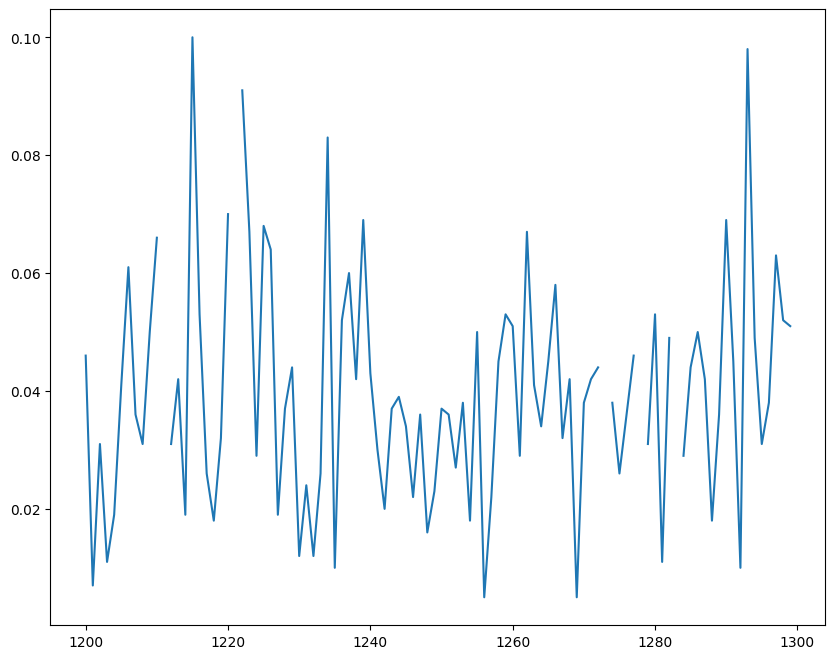

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
train_interpolate['hour_bef_ozone'][1200:1300].plot()

<Axes: >

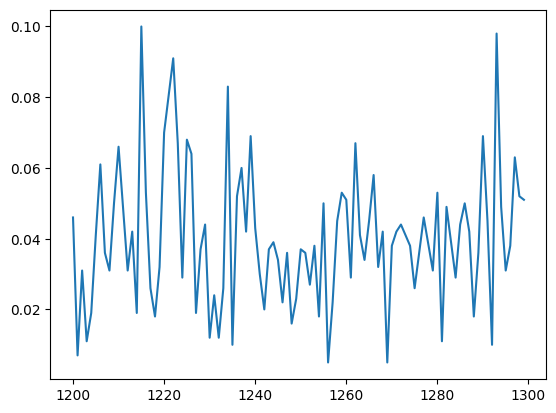

In [ ]:
import matplotlib.pyplot as plt

train_interpolate_1 = train_interpolate['hour_bef_ozone'].interpolate('linear')
train_interpolate_1[1200:1300].plot()

<Axes: >

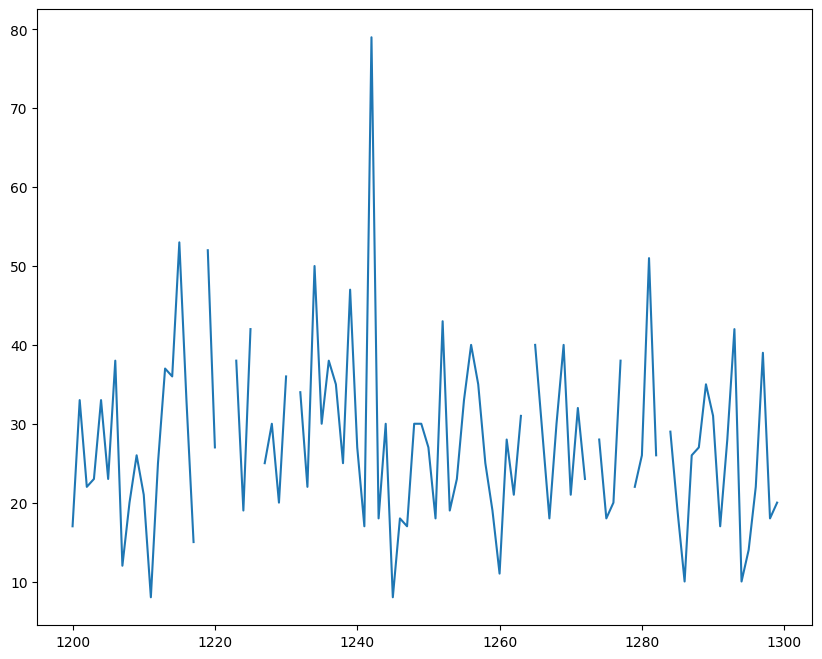

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
train_interpolate['hour_bef_pm2.5'][1200:1300].plot()

<Axes: >

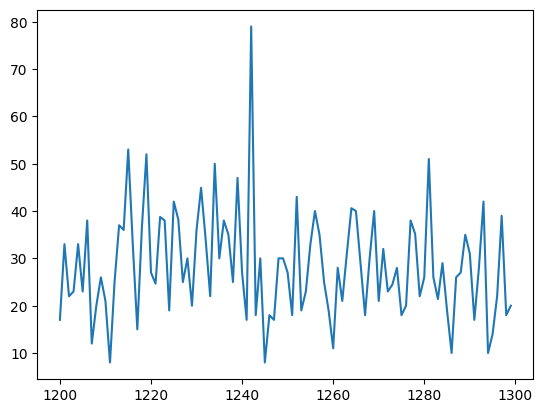

In [ ]:
import matplotlib.pyplot as plt

train_interpolate_2 = train_interpolate['hour_bef_pm2.5'].interpolate('cubic')
train_interpolate_2[1200:1300].plot()

In [ ]:
train_interpolate.interpolate('linear', inplace=True)
train_interpolate.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

### test

In [ ]:
test_interpolate = test[['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']].copy()
test_interpolate.interpolate('linear', inplace=True)

### model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = train_interpolate.drop(columns='count')
y_train = train['count']
X_test = test_interpolate.copy()

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.head()

,id,count
0,0,93.23
1,1,216.97
2,2,76.84
3,4,30.45
4,5,69.63


In [ ]:
submission.to_csv('rf_interpolate.csv', index=False)

- 46.180570399

# 표준화 및 정규화

## 표준화

### train

In [ ]:
from sklearn.preprocessing import StandardScaler

train_scaled = train_mean.copy()
test_scaled = test_mean.copy()
features = train_scaled.columns

scaler = StandardScaler()
scaler.fit(train_scaled[features])
train_scaled[features] = scaler.transform(train_scaled[features])
test_scaled[features] = scaler.transform(test_scaled[features])

In [ ]:
train_scaled.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility
0,1.229190,-0.080035,5.542292,-0.711998,1.806803,-1.423666
1,0.217691,0.645826,-0.180565,-0.784729,-0.207705,-0.840026
2,-0.793809,-0.538473,-0.180565,-1.293845,1.315459,-0.040096
3,1.662690,-1.646366,-0.180565,0.160773,0.087101,-0.788528
4,0.940191,2.441376,-0.180565,1.688121,-2.222213,1.020756


In [ ]:
test_scaled.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility
0,-0.649309,0.760435,-0.180565,-0.857459,0.480176,-0.774796
1,0.795691,2.536884,-0.180565,2.124506,-0.944720,0.316955
2,0.217691,0.435708,5.542292,-0.275612,2.101609,-2.081120
3,-0.793809,1.104264,-0.180565,0.015311,0.381907,-0.378264
4,1.518190,-0.404762,5.542292,0.669889,2.003340,-2.038205


### model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = train_scaled.copy()
y_train = train['count']
X_test = test_scaled.copy()

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.head()

,id,count
0,0,83.07
1,1,245.82
2,2,74.26
3,4,30.27
4,5,59.33


In [ ]:
submission.to_csv('rf_scaler.csv', index=False)

- 44.3534557117

## 정규화

### train, test

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer

train_scaled = train_mean.copy()
test_scaled = test_mean.copy()
features = train_scaled.columns

# scaler
scaler = StandardScaler()
scaler.fit(train_scaled[features])
train_scaled[features] = scaler.transform(train_scaled[features])
test_scaled[features] = scaler.transform(test_scaled[features])


train_normalized = train_scaled.copy()
test_normalized = test_scaled.copy()

# normalizer
normalizer = Normalizer()
normalizer.fit(train_normalized[features])
train_normalized[features] = scaler.transform(train_normalized[features])
test_normalized[features] = scaler.transform(test_normalized[features])

### model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = train_normalized.copy()
y_train = train['count']
X_test = test_normalized.copy()

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.head()

,id,count
0,0,83.07
1,1,245.82
2,2,74.26
3,4,30.27
4,5,59.32


In [ ]:
submission.to_csv('rf_normalizer.csv', index=False)

- 44.4767553056

# feature engineering

In [ ]:
import numpy as np

train_feature = train_scaled.copy()
test_feature = test_scaled.copy()

train_feature['commute'] = np.where(train_feature['hour'].isin([8, 18]), 1, 0)
train_feature['hour_sep'] = np.where(train_feature['hour'] > 13, 1, 0)
train_feature['temp'] = np.where(train_feature['hour_bef_temperature'] > 25, 1, 0)

test_feature['commute'] = np.where(test_feature['hour'].isin([8, 18]), 1, 0)
test_feature['hour_sep'] = np.where(test_feature['hour'] > 13, 1, 0)
test_feature['temp'] = np.where(test_feature['hour_bef_temperature'] > 25, 1, 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = train_feature.copy()
y_train = train['count']
X_test = test_feature.copy()

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.head()

,id,count
0,0,84.82
1,1,241.83
2,2,74.20
3,4,30.85
4,5,62.66


In [ ]:
submission.to_csv('rf_feature.csv', index=False)

- 44.4638047439

# feature selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

X_train = train_scaled.copy()
y_train = train['count']
X_test = test_scaled.copy()

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)

sfm = SelectFromModel(rf, threshold='median')
sfm.fit(X_train, y_train)


selected_features = sfm.get_support(indices=True)
X_train_selected = X_train.iloc[:, selected_features]

print("Selected features: ", X_train.columns[selected_features])

Selected features:  Index(['hour', 'hour_bef_temperature', 'hour_bef_humidity'], dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestRegressor

features = ['hour', 'hour_bef_temperature', 'hour_bef_humidity']
X_train = train_scaled[features]
y_train = train['count']
X_test = test_scaled[features]

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.head()

,id,count
0,0,92.77
1,1,231.13
2,2,82.29
3,4,33.41
4,5,75.71


In [ ]:
submission.to_csv('rf_feature_select.csv', index=False)

- 46.9707923272

# GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import pandas as pd

X_train = train_scaled.copy()
y_train = train['count']
X_test = test_scaled.copy()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42, 123, 456]
}

rf = RandomForestRegressor()
scorer = make_scorer(mean_squared_error, squared=False)
gs = GridSearchCV(estimator=rf, param_grid=param_grid,
                  scoring=scorer, cv=10, n_jobs=-1)

result = gs.fit(X_train, y_train)
print("최적 점수: {}".format(result.best_score_))
print("최적 파라미터: {}".format(result.best_params_))
print(gs.best_estimator_)

최적 점수: 40.85880991117838
최적 파라미터: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 456}
RandomForestRegressor(max_depth=10, min_samples_leaf=4, random_state=456)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = train_scaled.copy()
y_train = train['count']
X_test = test_scaled.copy()

rf = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2,
                           n_estimators=100, random_state=456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.head()

,id,count
0,0,84.779291
1,1,231.858438
2,2,77.453929
3,4,33.490303
4,5,49.894445


In [ ]:
submission.to_csv('rf_grid_base.csv', index=False)

- 44.4129587407

# 최종 모델

In [ ]:
def fill_na_hourly(df, columns, hourly_mean):
  for col in columns:
    nan_rows = df[df[col].isnull()]
    for idx, row in nan_rows.iterrows():
      hour = row['hour']
      mean_value = hourly_mean.loc[hour, col]
      df.at[idx, col] = mean_value

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# 결측치 처리
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility']

train_mean = train[features].copy()
test_mean = test[features].copy()

hourly_mean = train_mean.groupby('hour').mean()
target_columns = ['hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility']
fill_na_hourly(train_mean, target_columns, hourly_mean)
fill_na_hourly(test_mean, target_columns, hourly_mean)

# 스케일링
scaler = StandardScaler()
features = train_mean.columns
scaler.fit(train_mean[features])
train_mean[features] = scaler.transform(train_mean[features])
test_mean[features] = scaler.transform(test_mean[features])

# 학습
X_train = train_mean.copy()
y_train = train['count']
X_test = test_mean.copy()

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.head()